<a href="https://colab.research.google.com/github/suajeong52/heaveMPM/blob/main/Copy_of_0717sample14_MFK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install smt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for smt: filename=smt-2.0-cp310-cp310-linux_x86_64.whl size=672642 sha256=7b726238ee9689870b7cd56e5f1c6c908254f25e78a3904ee2fe18472fb340a0
  Stored in directory: /root/.cache/pip/wheels/c0/f0/58/98644c8bef7a61927a3835b3fa22d9e09a5bdc53f6505807b6
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25521 sha256=d59ca3325b38b46af1558f394a2366b0d5fa980d9f7c540f3307c653ae5ef715
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built smt pyDOE2


In [3]:
import numpy as np
from smt.sampling_methods import LHS
from smt.utils import compute_rms_error
from smt.applications import MFK
import matplotlib.pyplot as plt
import pandas as pd
from smt.surrogate_models import KRG

In [4]:
#x fidelity
xH = pd.read_excel('xt_H_0619.xlsx', usecols=[1]).values
xL = pd.read_excel('xt_L_0619.xlsx', usecols=[1]).values
#y fidelity
yH = pd.read_excel('mpmtrain_high_20.xlsx', usecols=[1]).values
yL = pd.read_excel('mpmtrain_low_40.xlsx', usecols=[1]).values
#test fidelity
x = pd.read_excel('xtest_data.xlsx', usecols=[1]).values
x_sort = pd.read_excel('xtest_data_sort.xlsx', usecols=[1]).values





In [5]:
# Fit the MFK model
sm = MFK(theta0=xH.shape[1] * [1.0], corr='pow_exp', print_prediction=True)
sm.set_training_values(xH, yH)
sm.set_training_values(xL, yL, name=0)

In [6]:
sm.train()
y_pred= sm.predict_values(x)
mse = sm.predict_variances(x)


___________________________________________________________________________
   
                                    MFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 20
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.2256536
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 50
   
   Predicting ...
   Predicting - done. Time (sec):  0.0011158
   
   Prediction time/pt. (sec) :  0.0000223
   


In [7]:
x

array([[19.20369354],
       [20.96520114],
       [19.38155267],
       [19.89253697],
       [20.34132661],
       [19.65669219],
       [20.04340177],
       [19.5551247 ],
       [20.25684431],
       [20.46746004],
       [20.41262063],
       [19.9476929 ],
       [20.1951257 ],
       [19.16587024],
       [20.08156219],
       [20.66992663],
       [20.87634382],
       [20.81791574],
       [20.89174457],
       [19.46740878],
       [19.48817809],
       [20.69121776],
       [20.59000577],
       [19.87873046],
       [19.83202978],
       [19.24745041],
       [19.06881298],
       [20.76412904],
       [19.01668088],
       [19.1320933 ],
       [20.93151101],
       [19.70234759],
       [19.72561548],
       [20.63955444],
       [19.5610955 ],
       [19.41676778],
       [20.75157117],
       [20.12679322],
       [19.29382243],
       [19.08000457],
       [20.03578427],
       [19.6268187 ],
       [19.99505557],
       [20.20393387],
       [20.38767508],
       [20

In [8]:
y_pred

array([[0.04564728],
       [0.04716686],
       [0.04556345],
       [0.04577876],
       [0.04654562],
       [0.04624009],
       [0.0453899 ],
       [0.04605265],
       [0.04610846],
       [0.04716471],
       [0.04681273],
       [0.04706576],
       [0.04560491],
       [0.0461769 ],
       [0.04504533],
       [0.04629899],
       [0.04551798],
       [0.0454212 ],
       [0.04571718],
       [0.0460857 ],
       [0.046104  ],
       [0.0461921 ],
       [0.04726516],
       [0.04567148],
       [0.04567955],
       [0.04508395],
       [0.04603955],
       [0.04568533],
       [0.04575029],
       [0.04627757],
       [0.04645737],
       [0.04614336],
       [0.0460786 ],
       [0.04657132],
       [0.04606906],
       [0.04580469],
       [0.04577265],
       [0.04513999],
       [0.04507247],
       [0.04609968],
       [0.04557161],
       [0.04625316],
       [0.04726531],
       [0.04567562],
       [0.04671959],
       [0.04644945],
       [0.04526331],
       [0.047

In [9]:
print(len(x), len(y_pred))


50 50


In [10]:
x_sort_low = pd.read_excel('pred_data_low_sort50.xlsx', usecols=[0]).values
y_pred_low = pd.read_excel('pred_data_low_sort50.xlsx', usecols=[1]).values

In [11]:
x_sort_low

array([[19.01668088],
       [19.06881298],
       [19.08000457],
       [19.1320933 ],
       [19.16587024],
       [19.20369354],
       [19.24745041],
       [19.29382243],
       [19.3358707 ],
       [19.38155267],
       [19.41676778],
       [19.46740878],
       [19.48817809],
       [19.5551247 ],
       [19.5610955 ],
       [19.6268187 ],
       [19.65669219],
       [19.70234759],
       [19.72561548],
       [19.76792406],
       [19.83202978],
       [19.87873046],
       [19.89253697],
       [19.9476929 ],
       [19.99505557],
       [20.03578427],
       [20.04340177],
       [20.08156219],
       [20.12679322],
       [20.1951257 ],
       [20.20393387],
       [20.25684431],
       [20.31831558],
       [20.34132661],
       [20.38767508],
       [20.41262063],
       [20.46746004],
       [20.51338503],
       [20.52073153],
       [20.59000577],
       [20.63955444],
       [20.66992663],
       [20.69121776],
       [20.75157117],
       [20.76412904],
       [20

In [12]:
y_pred_low

array([[0.04575029],
       [0.04603955],
       [0.04609968],
       [0.04627757],
       [0.0461769 ],
       [0.04564728],
       [0.04508395],
       [0.04507247],
       [0.04526331],
       [0.04556345],
       [0.04580469],
       [0.0460857 ],
       [0.046104  ],
       [0.04605265],
       [0.04606906],
       [0.04625316],
       [0.04624009],
       [0.04614336],
       [0.0460786 ],
       [0.04594996],
       [0.04567955],
       [0.04567148],
       [0.04577876],
       [0.04706576],
       [0.04726531],
       [0.04557161],
       [0.0453899 ],
       [0.04504533],
       [0.04513999],
       [0.04560491],
       [0.04567562],
       [0.04610846],
       [0.04644945],
       [0.04654562],
       [0.04671959],
       [0.04681273],
       [0.04716471],
       [0.04754338],
       [0.04759037],
       [0.04726516],
       [0.04657132],
       [0.04629899],
       [0.0461921 ],
       [0.04577265],
       [0.04568533],
       [0.0454212 ],
       [0.04551798],
       [0.045

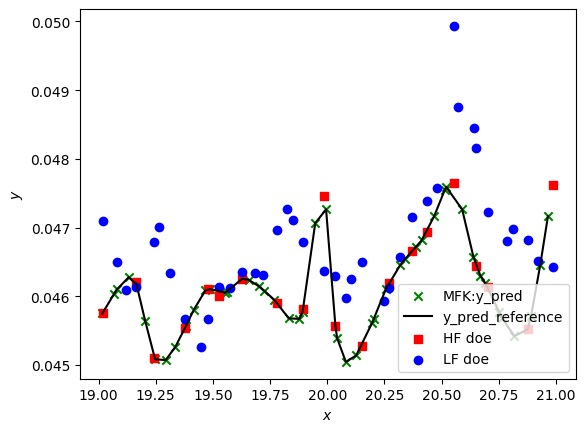

In [13]:
#그래프 그리기
plt.figure()

#plt.plot(X_test, y_pred, label="reference")
plt.scatter(x, y_pred, marker="x", color="g", label="MFK:y_pred")  # Scatter plot for y_pred
plt.plot(x_sort_low,y_pred_low, color='black',label="y_pred_reference")
plt.scatter(xH, yH, marker="s", color="red", label="HF doe")  # Scatter plot for HF doe
plt.scatter(xL, yL, marker="o", color="blue", label="LF doe")  # Scatter plot for LF doe
#(x_sort, y2, color='black')
plt.legend(loc=4)

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [15]:
#test data를 실제high fidelity AQWA 해석 결과
y_real = pd.read_excel('mpmTEST0628.xlsx', usecols=[1]).values
print(y_real)

[[0.04557294]
 [0.04708162]
 [0.04579449]
 [0.04586113]
 [0.04673081]
 [0.04655621]
 [0.04567505]
 [0.0461169 ]
 [0.04611125]
 [0.0472931 ]
 [0.04679275]
 [0.04555265]
 [0.04536839]
 [0.04617127]
 [0.04578683]
 [0.04639155]
 [0.05362107]
 [0.04600958]
 [0.04544047]
 [0.04592618]
 [0.0459288 ]
 [0.04619712]
 [0.04682661]
 [0.04566839]
 [0.04588028]
 [0.04509148]
 [0.04593286]
 [0.04606956]
 [0.0457358 ]
 [0.04684569]
 [0.0461573 ]
 [0.04662741]
 [0.0466869 ]
 [0.04637763]
 [0.04598122]
 [0.04558268]
 [0.04607292]
 [0.04546045]
 [0.04482693]
 [0.04620253]
 [0.0455263 ]
 [0.04629761]
 [0.04553711]
 [0.04555903]
 [0.04667802]
 [0.04670012]
 [0.04515645]
 [0.04819522]
 [0.04630486]
 [0.04807856]]


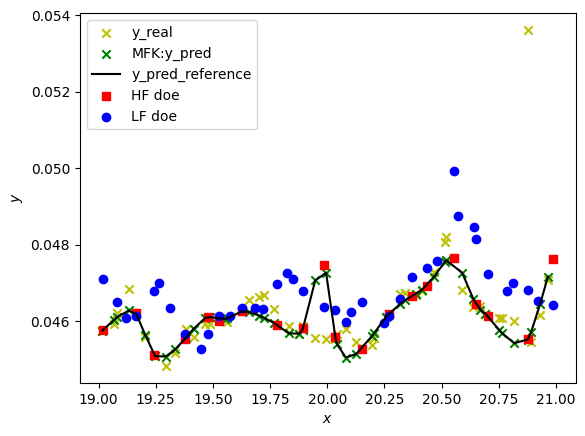

In [18]:
plt.figure()

#plt.plot(X_test, y_pred, label="reference")
plt.scatter(x, y_real, marker="x", color="y", label="y_real")  # Scatter plot for y_real
plt.scatter(x, y_pred, marker="x", color="g", label="MFK:y_pred")  # Scatter plot for y_pred
plt.plot(x_sort_low,y_pred_low, color='black',label="y_pred_reference")
plt.scatter(xH, yH, marker="s", color="red", label="HF doe")  # Scatter plot for HF doe
plt.scatter(xL, yL, marker="o", color="blue", label="LF doe")  # Scatter plot for LF doe

plt.legend(loc=0)
#plt.ylim(-10, 17)
#plt.xlim(-0.1, 1.1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

single kriging

low fidelity

In [ ]:
sm2 = KRG(theta0=[0.01], corr='pow_exp', pow_exp_power = 1.9)
sm2.set_training_values(xL, yL)
sm2.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 14
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0834281


___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 30
   
   Predicting ...
   Predicting - done. Time (sec):  0.0008223
   
   Prediction time/pt. (sec) :  0.0000274
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 14
   
   Predicting ...
   Predicting - done. Time (sec):  0.0016704
   
   Prediction time/pt. (sec) :  0.0001193
   


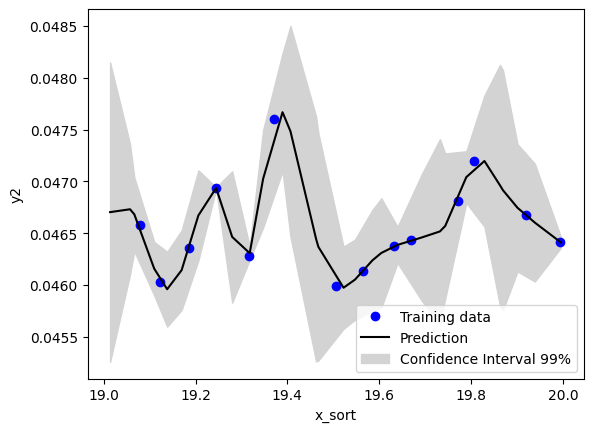

In [ ]:


y2 = sm2.predict_values(x_sort)
# estimated variance
s2 = sm2.predict_variances(x_sort)
# derivative according to the first variable
dydx = sm2.predict_derivatives(xL, 0)
fig, axs = plt.subplots(1)

# add a plot with variance
axs.plot(xL, yL, "o", color='blue')
axs.plot(x_sort, y2, color='black')
axs.fill_between(
    np.ravel(x_sort),
    np.ravel(y2 - 3 * np.sqrt(s2)),
    np.ravel(y2 + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x_sort")
axs.set_ylabel("y2")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()

high fidelity

In [ ]:
sm3 = KRG(theta0=[0.01], corr='pow_exp', pow_exp_power = 1.9)
sm3.set_training_values(xH, yH)
sm3.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0947688


___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 30
   
   Predicting ...
   Predicting - done. Time (sec):  0.0006058
   
   Prediction time/pt. (sec) :  0.0000202
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 7
   
   Predicting ...
   Predicting - done. Time (sec):  0.0033226
   
   Prediction time/pt. (sec) :  0.0004747
   


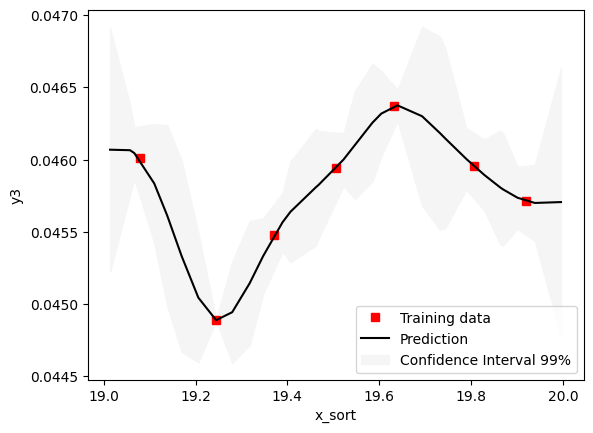

In [ ]:
y3 = sm3.predict_values(x_sort)
# estimated variance
s3 = sm3.predict_variances(x_sort)
# derivative according to the first variable
dydx3 = sm3.predict_derivatives(xH, 0)
fig3, axs3 = plt.subplots(1)

# add a plot with variance
axs3.plot(xH, yH, "s", color='red')
axs3.plot(x_sort, y3, color='black')
axs3.fill_between(
    np.ravel(x_sort),
    np.ravel(y3 - 3 * np.sqrt(s3)),
    np.ravel(y3 + 3 * np.sqrt(s3)),
    color="whitesmoke",
)
axs3.set_xlabel("x_sort")
axs3.set_ylabel("y3")
axs3.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()

all graph

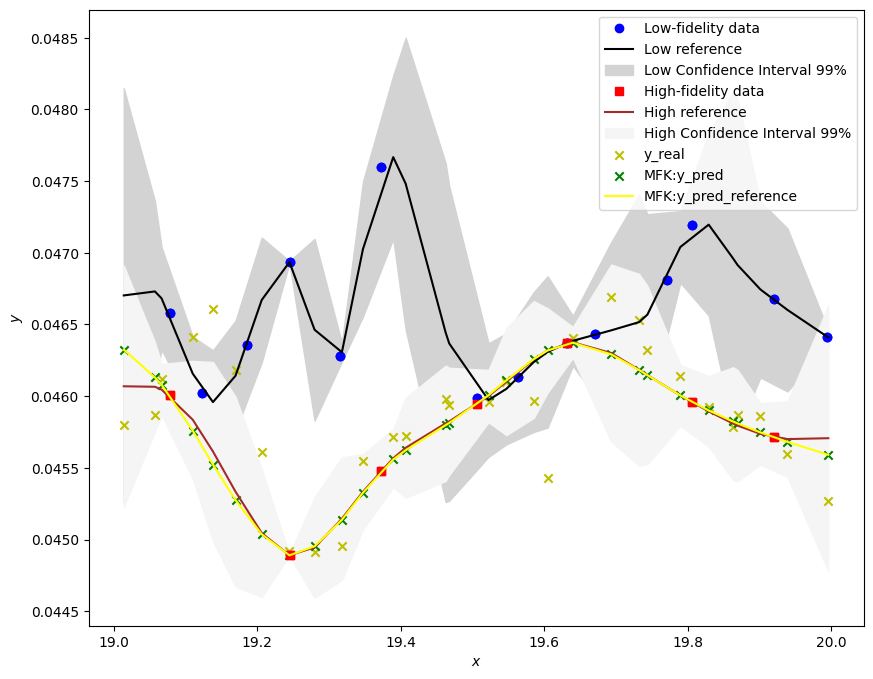

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))


# Kriging Graph 1
ax.plot(xL, yL, "o", color='blue')  # Plot LF doe data
ax.plot(x_sort, y2, color='black')  # Plot predicted values
ax.fill_between(
    np.ravel(x_sort),
    np.ravel(y2 - 3 * np.sqrt(s2)),
    np.ravel(y2 + 3 * np.sqrt(s2)),
    color="lightgrey",
)

# Kriging Graph 2
ax.plot(xH, yH, "s", color='red')  # Plot HF doe data
ax.plot(x_sort, y3, color='brown')  # Plot predicted values
ax.fill_between(
    np.ravel(x_sort),
    np.ravel(y3 - 3 * np.sqrt(s3)),
    np.ravel(y3 + 3 * np.sqrt(s3)),
    color="whitesmoke",
)


# Scatter plot x-axis and y-axis labels
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

# Scatter plot
ax.scatter(x, y_real, marker="x", color="y")  # Scatter plot for y_real
plt.scatter(x, y_pred, marker="x", color="g", label="MFK:y_pred")  # Scatter plot for y_pred
plt.plot(x_sort_low,y_pred_low, color='yellow',label="y_pred_reference")
ax.scatter(xH, yH, marker="s", color="red")  # Scatter plot for HF doe
ax.scatter(xL, yL, marker="o", color="blue")  # Scatter plot for LF doe

# legend
ax.legend(loc=0)

ax.legend(
    ["Low-fidelity data", "Low reference", "Low Confidence Interval 99%", "High-fidelity data","High reference","High Confidence Interval 99%", "y_real","MFK:y_pred","MFK:y_pred_reference"],
    loc="upper right",
)

plt.show()

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 14
   
   Predicting ...
   Predicting - done. Time (sec):  0.0011554
   
   Prediction time/pt. (sec) :  0.0000825
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 7
   
   Predicting ...
   Predicting - done. Time (sec):  0.0006876
   
   Prediction time/pt. (sec) :  0.0000982
   


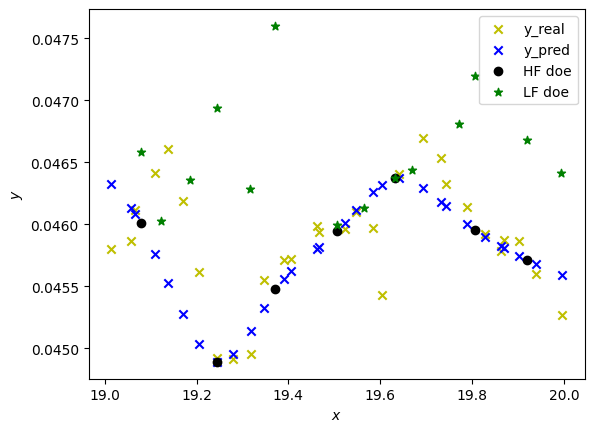

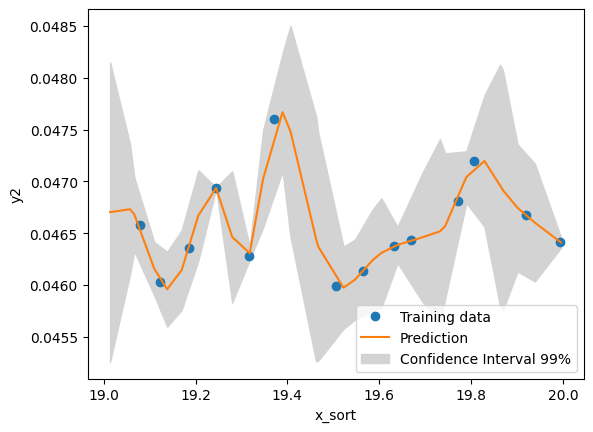

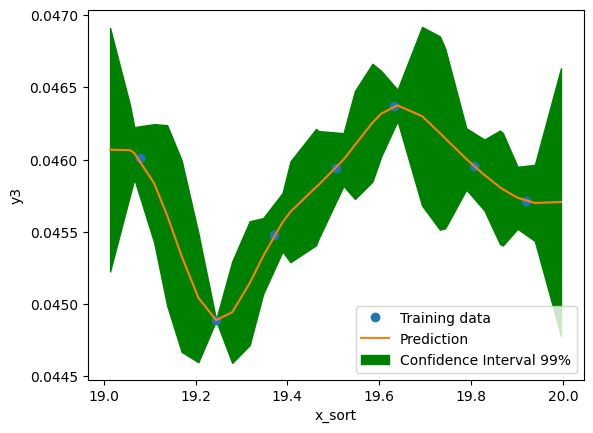

In [ ]:


#plt.plot(X_test, y_pred, label="reference")
plt.scatter(x, y_real, marker="x",color="y", label="y_real")
plt.scatter(x, y_pred, marker="x",color="b", label="y_pred")
plt.scatter(xH, yH, marker="o", color="k", label="HF doe")
plt.scatter(xL, yL, marker="*", color="g", label="LF doe")

plt.legend(loc=0)
#plt.ylim(-10, 17)
#plt.xlim(-0.1, 1.1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

#low single kriging
dydx = sm2.predict_derivatives(xL, 0)
fig, axs = plt.subplots(1)
axs.plot(xL, yL, "o")
axs.plot(x_sort, y2)
axs.fill_between(
    np.ravel(x_sort),
    np.ravel(y2 - 3 * np.sqrt(s2)),
    np.ravel(y2 + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x_sort")
axs.set_ylabel("y2")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

#low single kriging
dydx = sm3.predict_derivatives(xH, 0)
fig, axs = plt.subplots(1)

# add a plot with variance
axs.plot(xH, yH, "o")
axs.plot(x_sort, y3)
axs.fill_between(
    np.ravel(x_sort),
    np.ravel(y3 - 3 * np.sqrt(s3)),
    np.ravel(y3 + 3 * np.sqrt(s3)),
    color="green",
)
axs.set_xlabel("x_sort")
axs.set_ylabel("y3")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)


plt.show()

In [ ]:
import pandas as pd

In [ ]:
print(mse)

[[3.94366836e-08]
 [5.58955626e-08]
 [1.57190446e-08]
 [7.52128838e-08]
 [1.29775184e-08]
 [9.01597267e-09]
 [3.45260941e-08]
 [5.81115699e-08]
 [3.78811792e-08]
 [1.91455592e-08]
 [3.74133334e-08]
 [3.90243296e-08]
 [3.65215944e-08]
 [6.52285146e-08]
 [1.07309906e-08]
 [1.52416557e-07]
 [8.71357648e-09]
 [1.15832389e-07]
 [1.79472454e-08]
 [2.65386403e-08]
 [3.29199273e-08]
 [1.41197402e-08]
 [3.10793409e-09]
 [8.09194487e-08]
 [1.72154809e-07]
 [3.08577119e-08]
 [7.26899412e-08]
 [3.22525174e-08]
 [2.39977297e-08]
 [4.28415374e-12]]


In [ ]:
#mesh low로 구했을때의 정확도? 비율?
yP = y_pred/y_real
print(yP)

[[0.98588363]
 [0.99136952]
 [0.99950088]
 [0.98031434]
 [0.99743893]
 [1.00099589]
 [0.99723424]
 [1.00089264]
 [1.00086706]
 [1.01959872]
 [0.99869193]
 [0.99599849]
 [0.99512894]
 [0.99618683]
 [0.99711104]
 [1.01143602]
 [0.99921305]
 [1.00399819]
 [1.00186226]
 [1.00023637]
 [0.99786315]
 [0.99659601]
 [0.99936852]
 [0.97674512]
 [1.00709662]
 [1.00630807]
 [0.99246338]
 [0.98737866]
 [1.00572869]
 [0.99930249]]
